In [8]:
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.model_selection import train_test_split
import cv2
import  matplotlib.pyplot as plt

Définir les paramètres

In [9]:
IMAGE_SIZE = (128, 128)
#SEQUENCE_LENGTH = 5  # nombre d'images par séquence
SEQUENCE_LENGTH = 1
DATASET_PATH = "dataset"


Charger les images et créer les séquences

In [10]:
#plus images
# def load_sequences_from_folder(folder_path, label):
#     files = sorted(os.listdir(folder_path))
#     sequences = []
#     labels = []

#     for i in range(len(files) - SEQUENCE_LENGTH + 1):
#         sequence = []
#         for j in range(SEQUENCE_LENGTH):
#             img_path = os.path.join(folder_path, files[i + j])
#             image = load_img(img_path, target_size=IMAGE_SIZE)
#             image = img_to_array(image) / 255.0  # Normalisation
#             sequence.append(image)
#         sequences.append(sequence)
#         labels.append(label)
    
#     return np.array(sequences), np.array(labels)

#une seule image 
def load_sequences_from_folder(folder_path, label):
    files = sorted(os.listdir(folder_path))
    sequences = []
    labels = []

    for i in range(len(files) - SEQUENCE_LENGTH + 1):
        img_path = os.path.join(folder_path, files[i])
        image = load_img(img_path, target_size=IMAGE_SIZE)
        image = img_to_array(image) / 255.0  # Normalisation
        sequences.append(image)  # juste l'image seule
        labels.append(label)
    
    return np.array(sequences), np.array(labels)



Charger les deux classes

In [11]:
# Uptrend = 1, Downtrend = 0
X_up, y_up = load_sequences_from_folder(os.path.join(DATASET_PATH, "uptrend"), label=1)
X_down, y_down = load_sequences_from_folder(os.path.join(DATASET_PATH, "downtrend"), label=0)

# Fusionner les données
X = np.concatenate((X_up, X_down), axis=0)
y = np.concatenate((y_up, y_down), axis=0)


Shuffle et split en Train / Val / Test

In [12]:
# Mélanger les données
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

# Séparer : 70% train, 15% val, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)


X_train: (2596, 128, 128, 3)
X_val: (556, 128, 128, 3)
X_test: (557, 128, 128, 3)


visualisation des donnes 

Image 0 - Label: 0


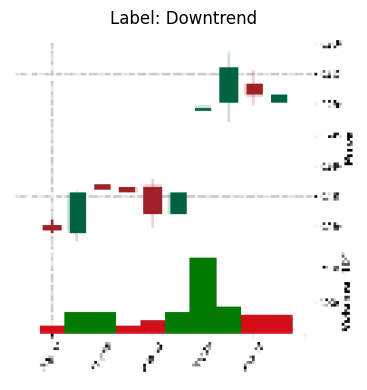

Image 1 - Label: 0


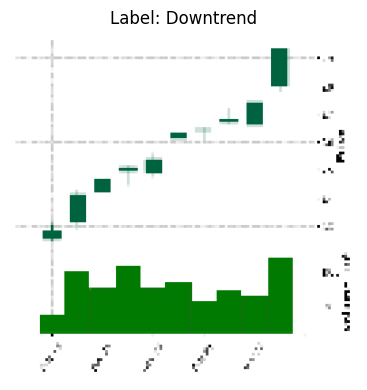

Image 2 - Label: 1


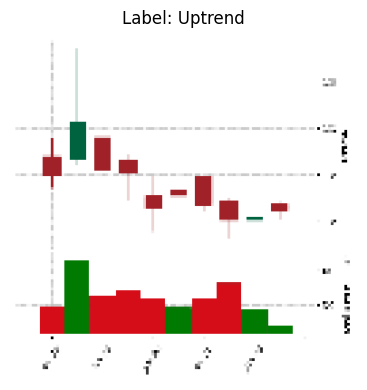

In [ ]:
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_val.npy", X_val)
np.save("y_val.npy", y_val)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)

#plusoeur images
# for i in range(3):  # Les 3 premières séquences
#     print(f"Sequence {i} - Label: {y_train[i]}")
    
#     sequence = X_train[i]  # (par ex: (10, 128, 128, 3))
    
#     # Afficher chaque image de la séquence
#     fig, axs = plt.subplots(1, len(sequence), figsize=(15, 2))
#     for j, img in enumerate(sequence):
#         axs[j].imshow(img)
#         axs[j].axis('off')
#         axs[j].set_title(f"Img {j+1}")
#     plt.suptitle(f"Label: {y_train[i]}")
#     plt.show()



#une seule image 
for i in range(3):
    print(f"Image {i} - Label: {y_train[i]}")

    # Convertir les valeurs de [0, 1] à [0, 255] pour un affichage correct
    image = (X_train[i] * 255).astype('uint8')


    # Redimensionner pour un affichage plus clair
    image_resized = cv2.resize(image, (256, 256), interpolation=cv2.INTER_AREA)

    # Afficher l’image
    plt.figure(figsize=(4, 4))
    plt.imshow(image_resized)
    plt.title(f"Label: {'Uptrend' if y_train[i]==1 else 'Downtrend'}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
